<a href="https://colab.research.google.com/github/glinkapiotr/Sales-Analysis/blob/master/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#import of libraries
import pandas as pd
import numpy as np
import os

In [43]:
os.listdir('./Sales_Data')

['Sales_August_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_February_2019.csv',
 'Sales_July_2019.csv',
 'Sales_April_2019.csv',
 'Sales_December_2019.csv',
 'Sales_June_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv',
 '.ipynb_checkpoints',
 'Sales_January_2019.csv']

In [44]:
#merging of 12 files of Sales_Data to 1 file
files = [file for file in os.listdir('./Sales_Data')]
#listing the files in directory
for file in files:
  print(file)
#definition of empty dataframe
all_data=pd.DataFrame()

#merging files
for file in files:
  if file != '.ipynb_checkpoints' or file != '.all_data.csv':
    df= pd.read_csv('./Sales_Data/' + file, engine = 'python')
    all_data= pd.concat([all_data, df])

#writing data to a single csv
all_data.to_csv("./Sales_Data/all_data.csv", index = False)
all_data.head()

Sales_August_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_February_2019.csv
Sales_July_2019.csv
Sales_April_2019.csv
Sales_December_2019.csv
Sales_June_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv
.ipynb_checkpoints
Sales_January_2019.csv


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [45]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [47]:
#checking for missing data
null_df = all_data[all_data.isna().any(axis=1)]
null_df.head(20)
null_df.info()
#it appears that rows with missing values seem to have multiple NaN. 545 rows.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 312 to 9664
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          0 non-null      object
 1   Product           0 non-null      object
 2   Quantity Ordered  0 non-null      object
 3   Price Each        0 non-null      object
 4   Order Date        0 non-null      object
 5   Purchase Address  0 non-null      object
dtypes: object(6)
memory usage: 29.8+ KB


In [48]:
#dropping the NaN rows
all_data = all_data.dropna(how = 'all')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [63]:
#after NaN dropped, we need the month column
all_data['Month']= all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()
# recieved this error ValueError: invalid literal for int() with base 10: 'Or'
#need to fix by filtering dataframe by itself with removed 'Or' values in 'Order Date' column


In [64]:
#performing the filtering
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or' ]

Question 1 : What was the best month for sales? How much was earned that month?

In [66]:
#review of combined and filtered dataframe
all_data.info()
#month column added, as int32 type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 9722
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [97]:
# need to add sales value column. Data types must be taken into consideration
all_data['Quantity Ordered']= all_data['Quantity Ordered'].astype(float)
all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data['Sales Value $'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 9722
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
 7   Sales Value $     185950 non-null  float64
 8   City              185950 non-null  object 
dtypes: float64(3), int32(1), object(5)
memory usage: 13.5+ MB


In [98]:
#list of months with summed Sales Value column
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales Value $
Month,,,
1,10903.0,1.811768e+06,1.822257e+06
2,13449.0,2.188885e+06,2.202022e+06
3,17005.0,2.791208e+06,2.807100e+06
4,20558.0,3.367671e+06,3.390670e+06
5,18667.0,3.135125e+06,3.152607e+06
6,15253.0,2.562026e+06,2.577802e+06
7,16072.0,2.632540e+06,2.647776e+06
8,13448.0,2.230345e+06,2.244468e+06
9,13109.0,2.084992e+06,2.097560e+06


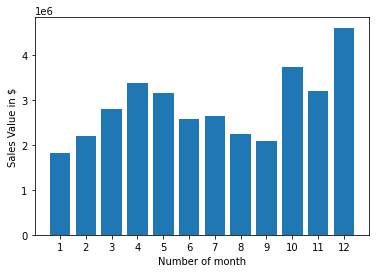

In [99]:
#plotting the sales values
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results['Sales Value $'])
plt.xticks(months)
plt.ylabel('Sales Value in $')
plt.xlabel('Number of month')
plt.show()

Answer : Highest sales value was noted in December

Question 2: What city had the highest number of sales

In [100]:
# it is necessary to extract city name column out of Purchase Address. City may have the same name in different states, state is also necessary to recieve.
def get_city(address):
  return address.split(', ')[1]
def get_state(address):
  state = (address.split(', ')[2])[0:2]
  return state
all_data['City']=all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Value $,City
0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX)
2,236672,iPhone,1.0,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City (NY)


In [93]:
#checking cities in the City column
all_data['City'].unique()

array(['Seattle WA', 'Dallas TX', 'Portland OR', 'Los Angeles CA',
       'New York City NY', 'San Francisco CA', 'Boston MA', 'Atlanta GA',
       'Austin TX', 'Portland ME'], dtype=object)

In [108]:
#grouping by City
results2 = all_data.groupby('City').sum()
results2

,Quantity Ordered,Price Each,Month,Sales Value $
City,,,,
Atlanta (GA),16602.0,2.779908e+06,104794,2.795499e+06
Austin (TX),11153.0,1.809874e+06,69829,1.819582e+06
Boston (MA),22528.0,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730.0,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289.0,5.421435e+06,208325,5.452571e+06
New York City (NY),27932.0,4.635371e+06,175741,4.664317e+06
Portland (ME),2750.0,4.471893e+05,17144,4.497583e+05
Portland (OR),11303.0,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239.0,8.211462e+06,315520,8.262204e+06


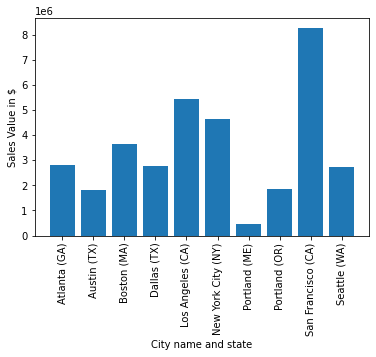

In [113]:
#plot - what city had the largest amount of sales
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results2['Sales Value $'])
plt.xticks(cities, rotation = 'vertical', size = 10)
plt.ylabel('Sales Value in $')
plt.xlabel('City name and state')
plt.show()